# Music as Data

Eamonn Bell <eamonn.bell@durham.ac.uk>  
Department of Computer Science  
Durham University

Guest lecture for Master of Data Science (Digital Humanities) students   
November 28, 2021

## Goals

- students will understand basic elements of music theory and their correlates in music data
    - tempo
    - pitch
    - intensity (volume)
- students will understand the basic distinction between symbolic and non-symbolic/audio music data
- students will understand the historical context for the collection and manipulation of music data and will have have reflected on the ethical and legal considerations of these activities
- students will be familiar with some popular Python packages useful for the manipulation of music data
- students will be aware of a selection of data sources, know where to look for more data, and have ideas of their own about where and how to collect music data


## Prerequisites

- numpy

In [81]:
import scipy

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
import librosa.display
import IPython.display as ipd

In [127]:
from ipywebrtc import AudioRecorder, CameraStream

camera = CameraStream(constraints={'audio': True,'video':False})
recorder = AudioRecorder(stream=camera)

## Sound is a time series

In [144]:
x, sr = librosa.load('data/ticks.wav')

In [145]:
type(x), type(sr)

(numpy.ndarray, int)

In [146]:
sr

22050

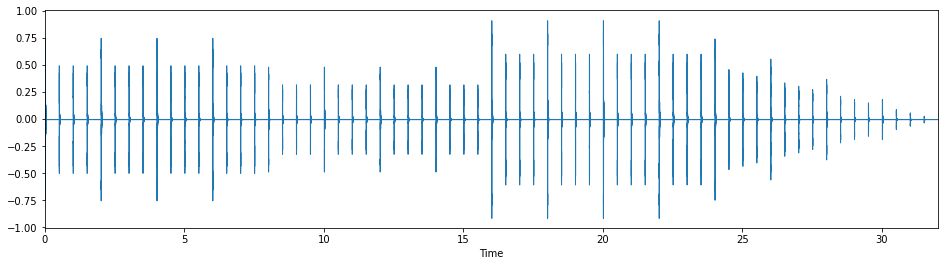

In [147]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x, sr=sr)
plt.show()
ipd.Audio(data=x, rate=sr)

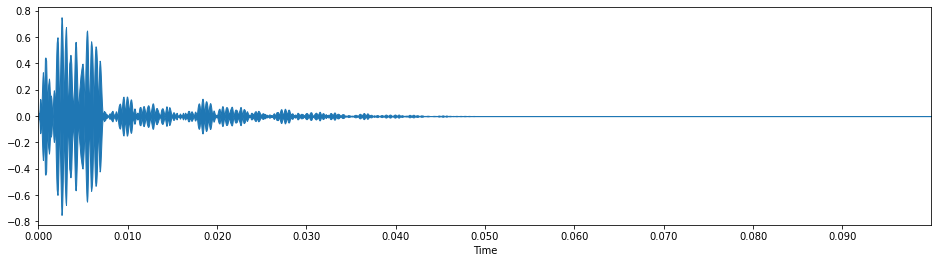

In [148]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x[:2205], sr=sr)
plt.show()

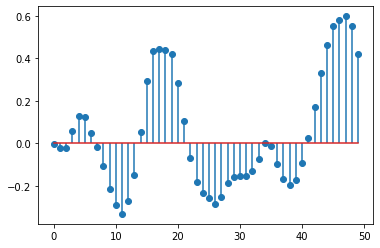

In [149]:
plt.stem(x[:50])
plt.show()

In [181]:
peak_indexes = scipy.signal.find_peaks(x, height=0.2)[0]

In [182]:
len(peak_indexes)

186

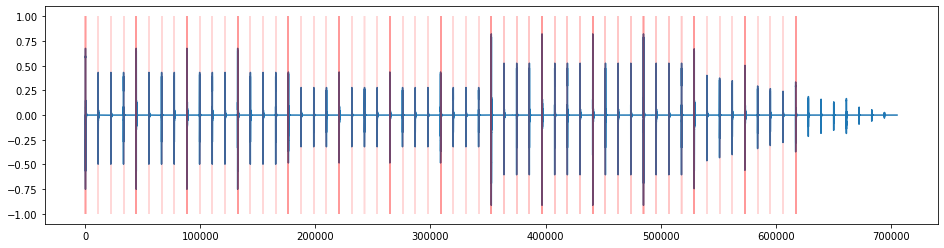

In [183]:
plt.figure(figsize=(16, 4))
plt.plot(x)
plt.vlines(peak_indexes, ymin=-1, ymax=1, colors='r', alpha=0.1)

- https://musicinformationretrieval.com/ipython_audio.html
- click (included)
- get students to detect onsets
- estimate tempo
- "beat"
- segment, sort, and remix

It is conventional to express tempo in the unit “beats per minute” (bpm). How can we compute the tempo from the list of indices for the detected onsets? Recall that the sample rate determines how “fast” time is moving.

In reality, onset detection and beat tracking are different tasks. To get a sense for why this is the case, listen to this example.

## Music's trace is structured sound

- autocorrelation
- fourier (spectrogram)
- "hop size"
- "timbre"

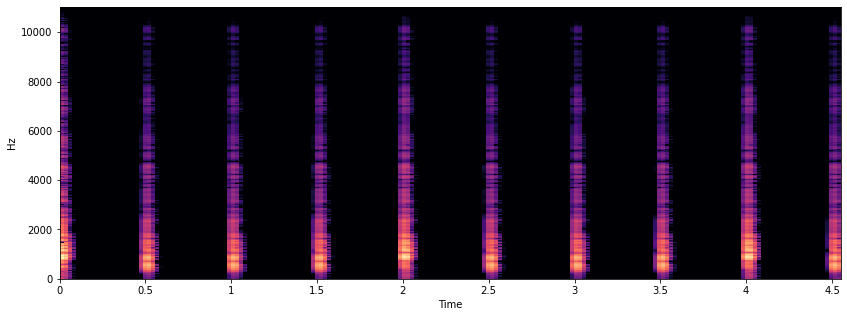

In [124]:
x, sr = librosa.load('data/ticks.wav')
X = librosa.stft(x[:100000])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.show()

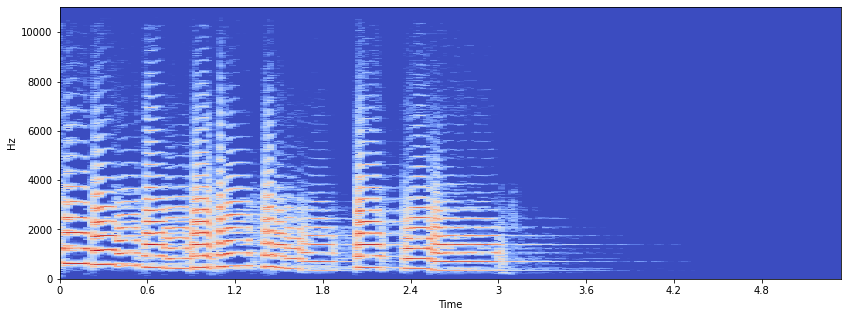

In [126]:
x, sr = librosa.load(librosa.example('trumpet'))
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.show()

## Analytical Interlude I (Analyzing Nicolas Collins's _Broken Light_ (1992))

## Musical scores try to capture the structure of music in writing

## Other sources of data about music

- implicit data (skips etc.)
- collaborative filtering [interesting paper - 4S?- I've forgotten about here]
- discography
- text
- motion (video, mocap)
- breathing (Finn Upham)

## Useful resources

### Python modules

### Learning

## Lab task

### 1. @DLEveryFriday

Every Friday since X, David Lynch has posted a video message.

download gallery
audalign

https://pypi.org/project/audalign/